In [3]:
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns
from matplotlib import style 
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score



In [4]:
import pandas as pd

# Attempt to read the CSV file with different encodings
try:
    df = pd.read_csv("C:/Adv seminar/graduation thesis/data/multiclass/reddit mental disord.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv("C:/Adv seminar/graduation thesis/data/multiclass/reddit mental disord.csv", encoding='ISO-8859-1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv("C:/Adv seminar/graduation thesis/data/multiclass/reddit mental disord.csv", encoding='latin1')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv("C:/Adv seminar/graduation thesis/data/multiclass/reddit mental disord.csv", encoding='utf-16')
            except UnicodeDecodeError as e:
                print("Failed to read the CSV file with different encodings.")
                raise e

# Display the first few rows of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   3600 non-null   object
 1   author  3600 non-null   object
 2   date    3600 non-null   object
 3   post    3600 non-null   object
dtypes: object(4)
memory usage: 112.6+ KB


In [5]:
def data_pre_processing(text):
    text = text.lower()
    text = re.sub(r"(http\s+|www\S+http\S+)", "",text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub("user",'',text)
    text = re.sub("url",'',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

c:\python\python install\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\python install\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\python install\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Label', ylabel='count'>

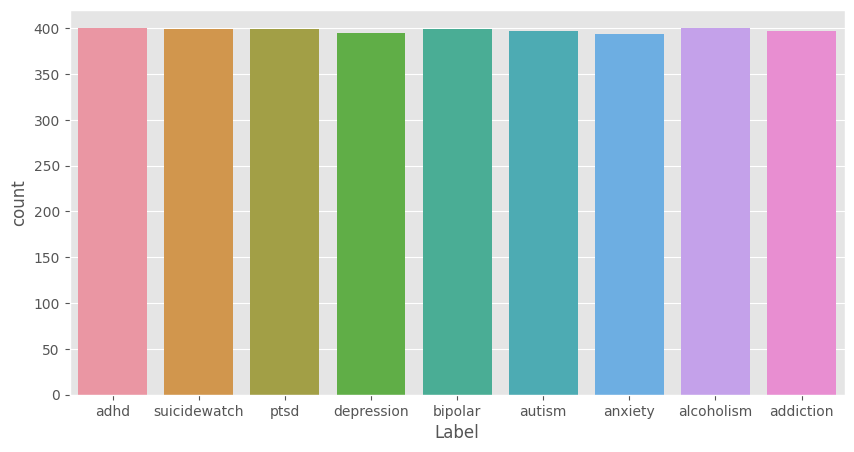

In [6]:
df.post = df['post'].apply(data_pre_processing)
df = df.drop_duplicates('post')
df['Label'].value_counts()
fig = plt.figure(figsize=(10,5))
sns.countplot(x = 'Label', data=df)

In [7]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(df['post'])
feature_names = vect.get_feature_names_out()
print('Number of features: {}\n'.format(len(feature_names)))
print('First 20 features : \n{}'.format(feature_names[:20]))

Number of features: 226500

First 20 features : 
['0000005' '0000005 percent' '005' '005 overall' '010' '010 would' '0100'
 '0100 worked' '019'
 '019 httpswwwtwitchtvxaltvcliparbitraryrelatedjalapenopunchtrees' '02'
 '02 mmoll' '02 range' '025mg' '025mg anxiety' '025mg xanax' '03'
 '03 2020' '03 mgkg' '03506']


In [8]:
X = df['post']
Y = df['Label']
X = vect.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)

x_train = x_train[y_train.notna()]
y_train = y_train.dropna()

x_test = x_test[y_test.notna()]
y_test = y_test.dropna()

print(f'size of x_train {x_train.shape}')
print(f'size of y_train {y_train.shape}')
print(f'size of x_test {x_test.shape}')
print(f'size of y_test {y_test.shape}')

size of x_train (2863, 226500)
size of y_train (2863,)
size of x_test (716, 226500)
size of y_test (716,)


In [9]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
tree_predict = decision_tree.predict(x_test)
cm = classification_report(y_test,tree_predict)
print(cm)

              precision    recall  f1-score   support

   addiction       0.49      0.48      0.48        71
        adhd       0.57      0.61      0.59        98
  alcoholism       0.73      0.64      0.68        83
     anxiety       0.62      0.53      0.57        78
      autism       0.65      0.55      0.60        74
     bipolar       0.58      0.60      0.59        77
  depression       0.30      0.43      0.35        75
        ptsd       0.75      0.71      0.73        77
suicidewatch       0.51      0.48      0.50        83

    accuracy                           0.56       716
   macro avg       0.58      0.56      0.57       716
weighted avg       0.58      0.56      0.57       716

